In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df= yf.download('^GDAXI', start='2019-01-01')

[*********************100%%**********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200
...,...,...,...,...,...,...
2023-12-01,16296.919922,16399.060547,16279.450195,16397.519531,16397.519531,68139400
2023-12-04,16390.169922,16455.679688,16386.800781,16404.759766,16404.759766,52149300
2023-12-05,16405.140625,16551.339844,16394.019531,16533.109375,16533.109375,63916000


In [7]:
df['MA20'] = df['Adj Close'].rolling(20).mean()
df['MA50'] = df['Adj Close'].rolling(50).mean()

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700,NaN,NaN
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800,NaN,NaN
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500,NaN,NaN
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400,NaN,NaN
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-01,16296.919922,16399.060547,16279.450195,16397.519531,16397.519531,68139400,15752.042480,15363.759785
2023-12-04,16390.169922,16455.679688,16386.800781,16404.759766,16404.759766,52149300,15815.481982,15383.745176
2023-12-05,16405.140625,16551.339844,16394.019531,16533.109375,16533.109375,63916000,15884.505469,15409.289961


In [9]:
df = df.dropna()

In [10]:
df = df[['Adj Close','MA20','MA50']]

In [11]:
df

,Adj Close,MA20,MA50
Date,,,
2019-03-12,11524.169922,11447.165967,11187.565020
2019-03-13,11572.410156,11467.425488,11207.409414
2019-03-14,11587.469727,11492.309473,11230.825605
2019-03-15,11685.690430,11511.604004,11249.185605
2019-03-18,11657.059570,11529.496973,11267.370605
...,...,...,...
2023-12-01,16397.519531,15752.042480,15363.759785
2023-12-04,16404.759766,15815.481982,15383.745176
2023-12-05,16533.109375,15884.505469,15409.289961


In [12]:
Buy = []
Sell = []
for i in range(len(df)):
    if df.MA20.iloc[i] > df.MA50.iloc[i] \
    and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
        Buy.append(i)
    
    
    elif df.MA20.iloc[i] < df.MA50.iloc[i] \
    and df.MA20.iloc[i-1] > df.MA50.iloc[i-1]:
        Sell.append(i)





In [13]:
Buy

[75, 132, 288, 432, 613, 671, 719, 789, 820, 867, 926, 1041, 1113, 1197]

In [14]:
Sell

[59, 102, 243, 398, 601, 640, 699, 735, 796, 830, 888, 1026, 1102, 1129]

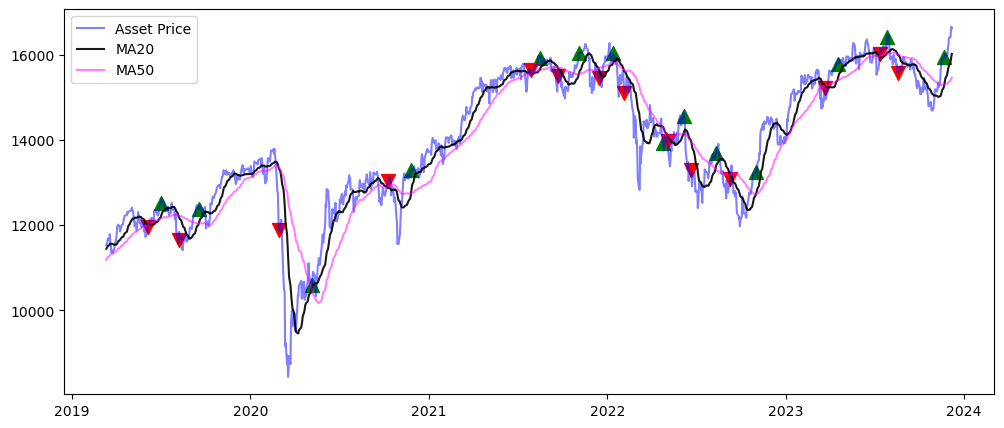

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df['Adj Close'],label= 'Asset Price', c = 'blue',alpha= 0.5)
plt.plot(df['MA20'],label= 'MA20', c = 'k',alpha= 0.9)
plt.plot(df['MA50'],label= 'MA50', c = 'magenta',alpha= 0.5)
plt.scatter(df.iloc[Buy].index,df.iloc[Buy]['Adj Close'],marker='^', color='g',s=100)
plt.scatter(df.iloc[Sell].index,df.iloc[Sell]['Adj Close'],marker='v', color='r',s=100)
plt.legend()
plt.show()